**Assignment1**

**Ibrahim Nobani : 1190278**


**Question#1**

Look for an image from the internet with the following properties: 8-bit gray-level,
256x256 pixels in size.

1- Show this image. Don’t use your friends’ ones.

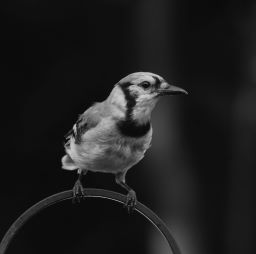

In [127]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image1 = cv2.imread('bird2.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image1)


2- Apply a power law transformation with gamma=0.4 to the image and show
the image after the transformation.

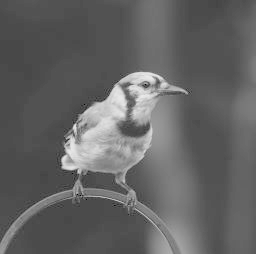

In [128]:
gamma = 0.4
imageT = np.power(image1 / 255.0, gamma) * 255

cv2_imshow(imageT)
cv2.waitKey(0)
cv2.destroyAllWindows()


From the two images above and after applying, we can notice the image is brighter, because of the power law transofrmation applied, meaning the transformed image has a higher pixel that the orginal image.

3- Add a zero-mean Gaussian noise (with variance =40 gray-levels) to the
original image and show the resulting image.

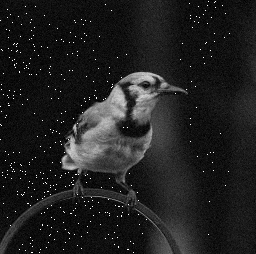

In [129]:
variance = 40
gNoise = np.random.normal(0, np.sqrt(variance), image1.shape)
imageNoisy = image1 + gNoise.astype(np.uint8)

cv2_imshow(imageNoisy)
cv2.waitKey(0)
cv2.destroyAllWindows()


As noticed the gaussian noise appear as random white pixels on the image.

4- Apply a 5 by 5 mean filter to the noisy-image you obtained in point 3 above
and show the result. Discuss the results in your report.

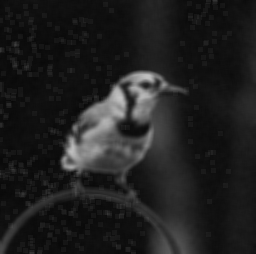

In [130]:
imageMean = cv2.blur(imageNoisy, (5, 5))

cv2_imshow(imageMean)
cv2.waitKey(0)
cv2.destroyAllWindows()


Applying a 5 by 5 mean filter to the noisy image reduced high-frequency noise by averaging pixel values in local neighborhoods, resulting in a smoother, denoised image.

5- Add salt and pepper noise (noise-density=0.1) to the original image and then
apply a 7 by 7 median filter to the noisy-image and show both images.

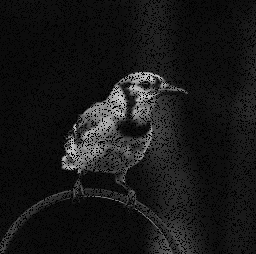

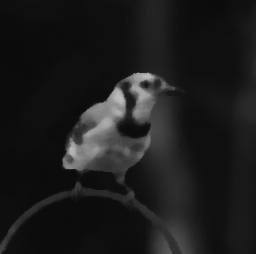

In [131]:
def addSaltAndPepperNoise(image, saltRatio=0.1, pepperRatio=0.1):
    row, col = image.shape
    salt = np.random.rand(row, col) < saltRatio
    pepper = np.random.rand(row, col) < pepperRatio
    noisyImage = np.copy(image)
    noisyImage[salt] = 1
    noisyImage[pepper] = 0
    return noisyImage

noisyImageSp = addSaltAndPepperNoise(image1)
#Median Filter:
medianFilteredImage = cv2.medianBlur(noisyImageSp, 7)

cv2_imshow(noisyImageSp)
cv2_imshow(medianFilteredImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

As seen random black (salt) and white (pepper) pixels scattered throughout the first image, representing the added noise.
In the second image The median filter effectively removes isolated outlier pixels by replacing each pixel with the median value in its local neighborhood, this process resulted in smoothing effect or blurring

6- Apply a 7 by 7 mean filter to the salt and pepper noisy-image and show the
result. Discuss the results in your report

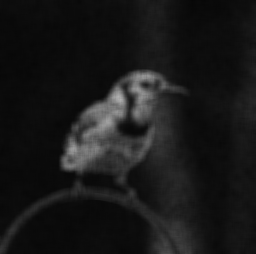

In [132]:
imageMean7x7 = cv2.blur(noisyImageSp, (7, 7))

cv2_imshow(imageMean7x7)
cv2.waitKey(0)
cv2.destroyAllWindows()


7- Apply a Sobel filter to the original image and show the response (don’t use
ready functions to do this part).


In [133]:
def sobelFilter(inputImage, xKernel, yKernel):
    padWidth = ((xKernel.shape[0] - 1) // 2, (yKernel.shape[1] - 1) // 2)
    paddedImage = np.pad(inputImage, padWidth, mode='constant', constant_values=0)

    resultMagnitude = np.zeros_like(inputImage)

    for i in range(inputImage.shape[0] - 2):
        for j in range(inputImage.shape[1] - 2):
            xResult = np.sum(np.multiply(xKernel, paddedImage[i:i + 3, j:j + 3]))
            yResult = np.sum(np.multiply(yKernel, paddedImage[i:i + 3, j:j + 3]))
            resultMagnitude[i + 1, j + 1] = np.sqrt(xResult**2 + yResult**2)

    return resultMagnitude

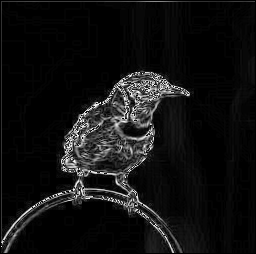

In [134]:
sobelX = np.array([[1, 0, -1],
 [2, 0, -2],
 [1, 0, -1]])

sobelY = np.array([[1, 2, 1],
 [0, 0, 0],
 [-1, -2, -1]])
image1Sobel = sobelFilter(image1, sobelX, sobelY)

cv2_imshow(image1Sobel.astype(np.uint8))


**Question 2**

Write a function that convolves an image with a given convolution filter function

[output_Image]= myImageFilter( Input_image, filter)

Your function should output image of the same size as that of input Image (use padding).

Test your function (on attached images “House1.jpg” and “House2.jpg”) and show results on the following Kernels.

First Displaying the two house images:

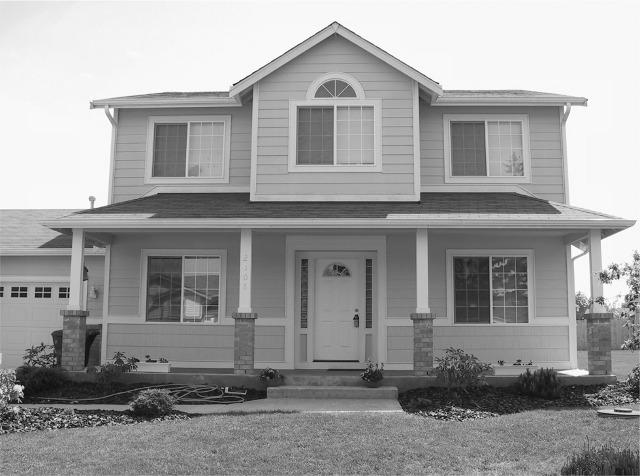

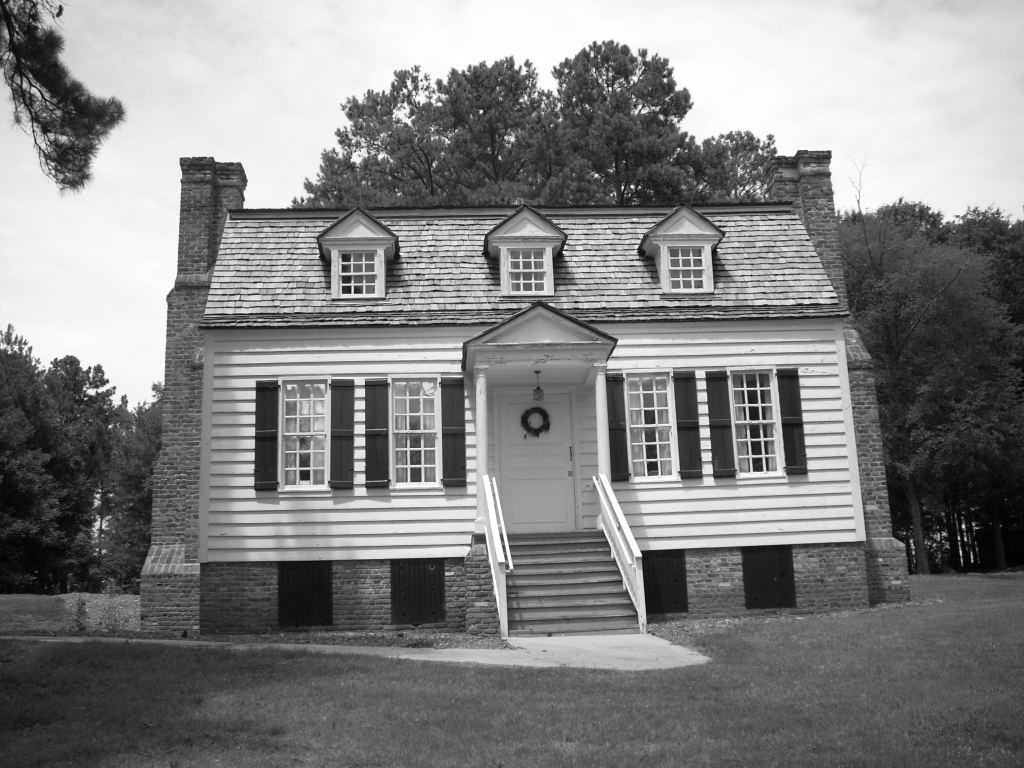

In [135]:
house1 = cv2.imread('House1.jpg', cv2.IMREAD_GRAYSCALE)
house2 = cv2.imread('House2.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(house1)
cv2_imshow(house2)


Creating the image filter function as follows:

In [136]:
import numpy as np

def ImageConvolutionFilter(InputImage, filter):
  M, N = InputImage.shape
  m, n = filter.shape

  padWidth = ((m // 2), (n // 2))
  paddedImage = np.pad(InputImage, padWidth, mode='constant', constant_values=0)

  outputImage = np.zeros((M, N))

  for i in range(M):
    for j in range(N):
      outputImage[i, j] = np.sum(paddedImage[i:i + m, j:j + n] * filter)

  return outputImage

1- Averaging Kernel (3×3 and 5×5 )
First applying the averaging kernels to the House1.jpg

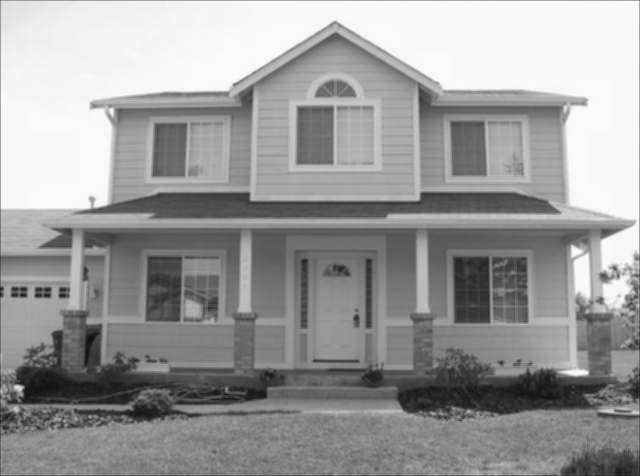

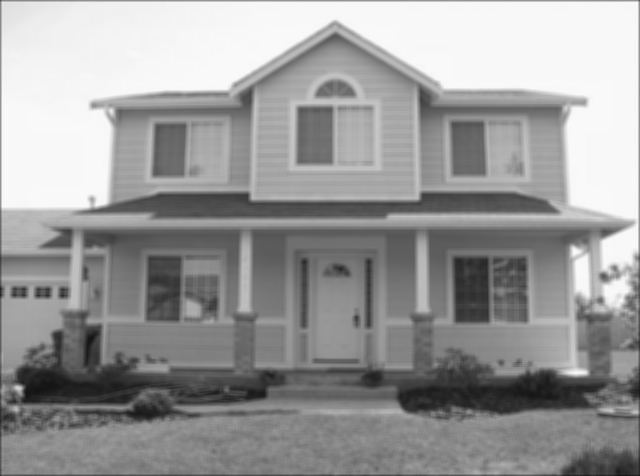

In [137]:
average3x3 = np.ones((3, 3), dtype=np.float32) / 9.0
average5x5 = np.ones((5, 5), dtype=np.float32) / 25.0

house13x3 = ImageConvolutionFilter(house1, average3x3)

house15x5 = ImageConvolutionFilter(house1, average5x5)

cv2_imshow(house13x3.astype(np.uint8))
cv2_imshow(house15x5.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

Applying these kernels to the second house image as well:

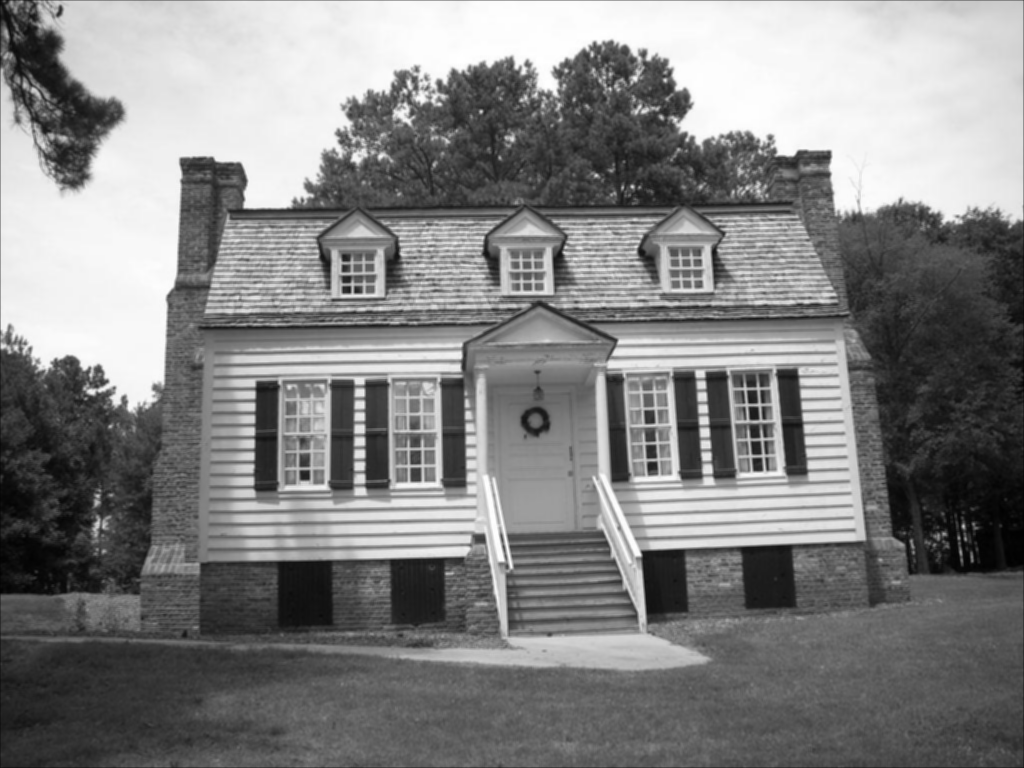

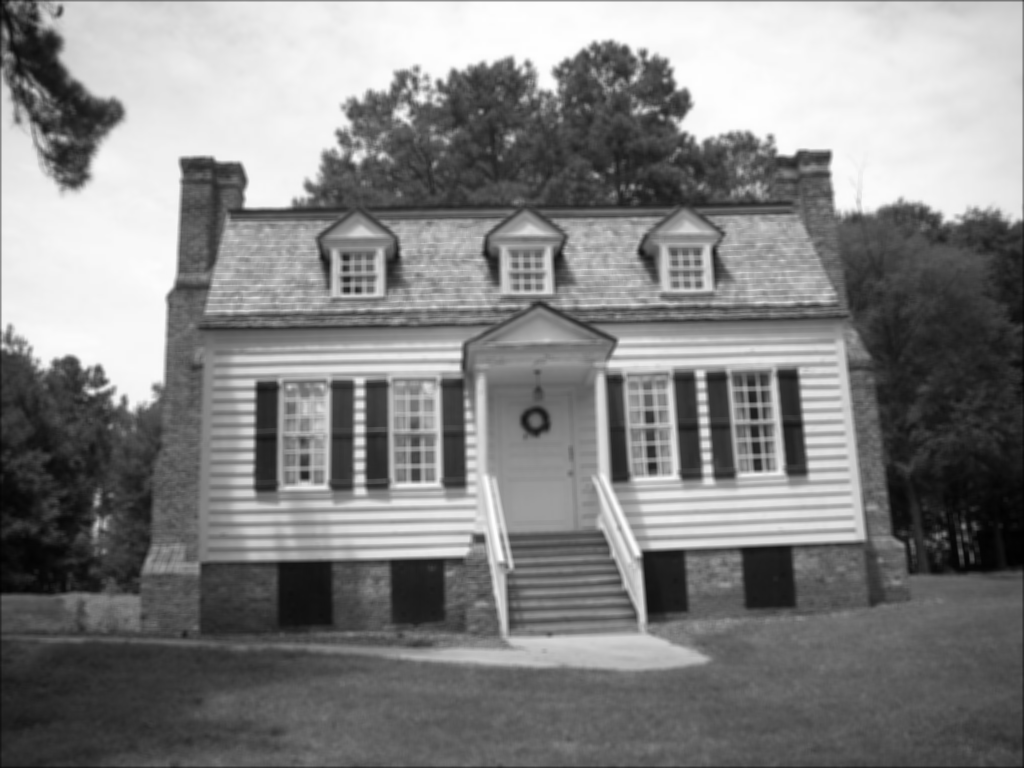

In [138]:
average3x3 = np.ones((3, 3), dtype=np.float32) / 9.0
average5x5 = np.ones((5, 5), dtype=np.float32) / 25.0

house23x3 = ImageConvolutionFilter(house2, average3x3)

house25x5 = ImageConvolutionFilter(house2, average5x5)

cv2_imshow(house23x3.astype(np.uint8))
cv2_imshow(house25x5.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

Averaging kernels were used for smoothing or blurring images and are effective at reducing noise.

As observed by applying the two kernel filters to the two house images, first applying the
3x3 Averaging Kernel, we can notice the images being slightly blurred or smoothed.
Any noise in the image might be reduced.

As for the 5x5 Averaging Kernel The blurring is noticed more compared to the 3x3 kernel.

So whenever the kernel is larger we can notice the blurring effect is more, but also it provides more noise reduction, so this is a tradeoff.

2- Gaussian Kernel (σ = 1,2,3 ) Use (2σ +1)×(2σ +1) as size of Kernel (You may write
a separate function to generate Gaussian Kernels for different values of σ). Discuss
the results in your report

First we wrote a method to generate the gaussian kernels for the different sigma values we have.

In [139]:
def gaussianKernelGenerator(sigma):
    size = int(2 * sigma) + 1
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

Then this was applied to the first house image

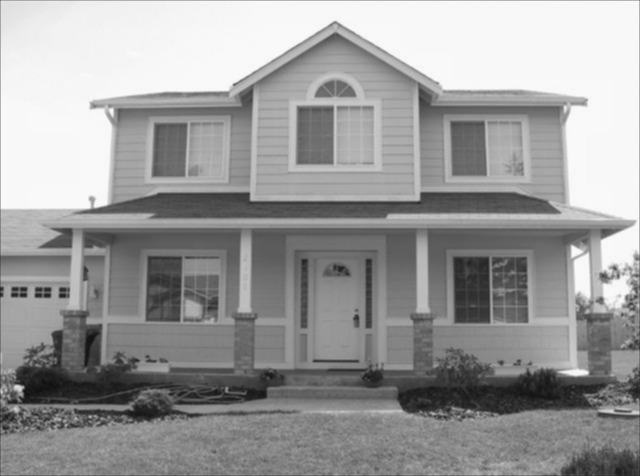

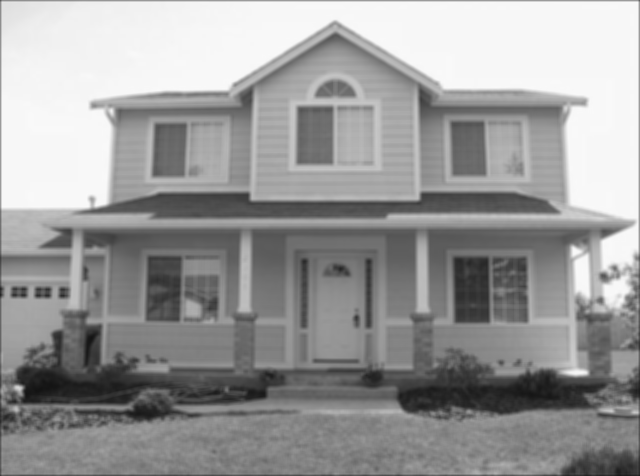

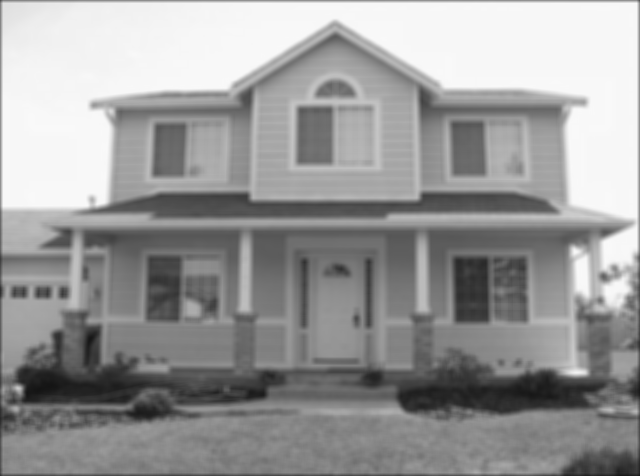

In [140]:
sigmas = [1, 2, 3]

for sigma in sigmas:
    gKernel = gaussianKernelGenerator(sigma)
    house1g = ImageConvolutionFilter(house1, gKernel)

    cv2_imshow(house1g.astype(np.uint8))
    cv2.waitKey(0)

cv2.destroyAllWindows()

Then applying this to the second image:

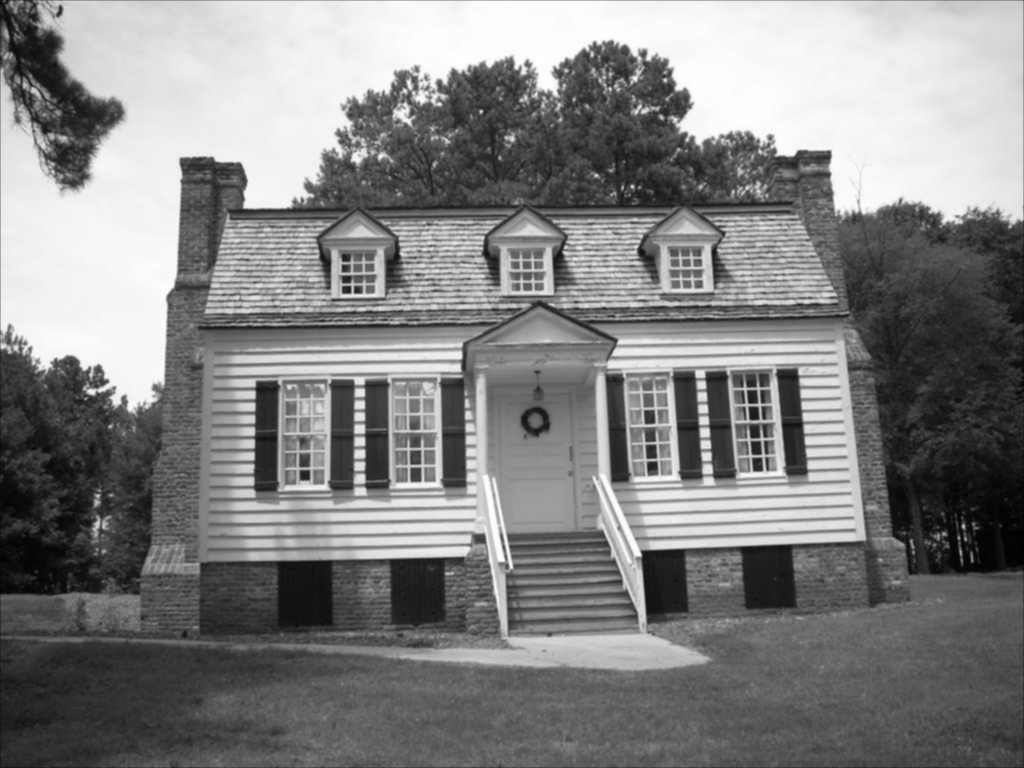

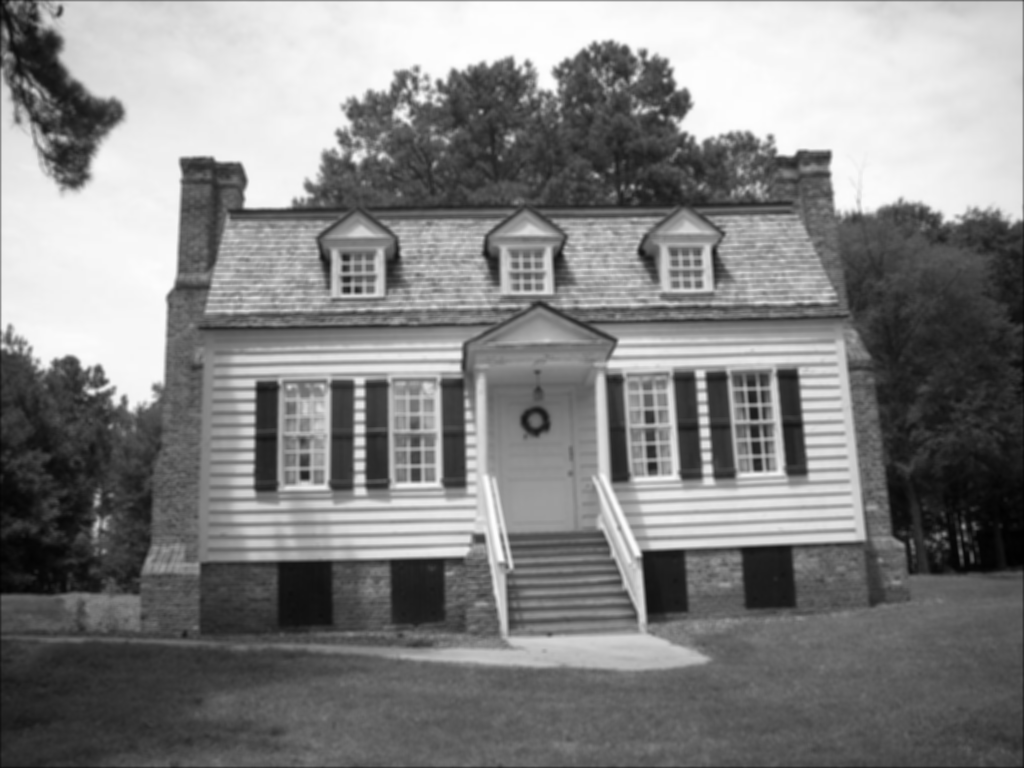

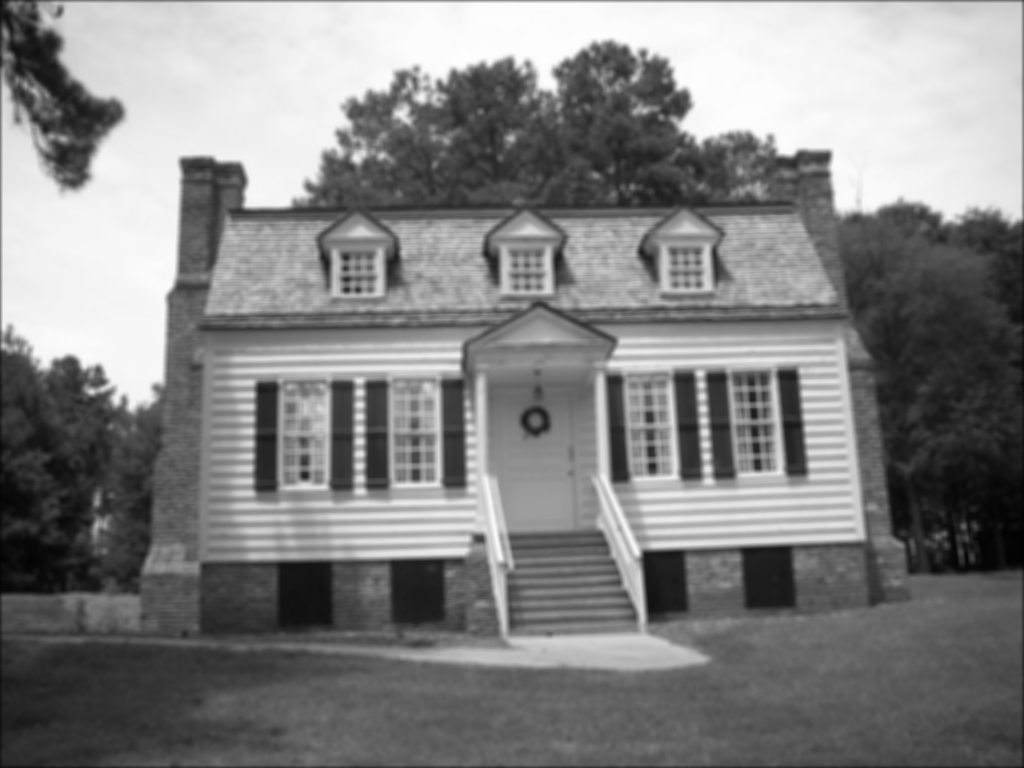

In [141]:
for sigma in sigmas:
    gKernel = gaussianKernelGenerator(sigma)
    house2g = ImageConvolutionFilter(house2, gKernel)

    cv2_imshow(house2g.astype(np.uint8))
    cv2.waitKey(0)

cv2.destroyAllWindows()

Upon applying Gaussian Kernels using two different images, we noticed the smoothing effect they have similar to Averaging Kernels in the first sections, as well as more blurring as sigma value increases, so ones with smaller sigma values will have more details retained, while larger values will lead to a more blurred appearance.

Gaussian Kernels are also effective at reducing noise in an image. The filtered images have reduced high-frequency noise, making them visually cleaner.


3- Sobel Edge Operators:

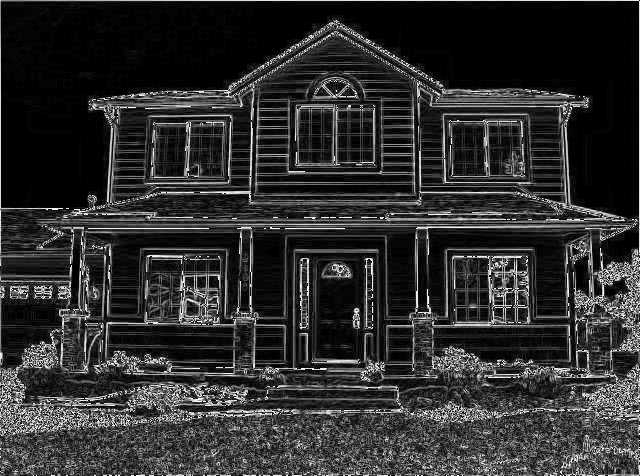

In [142]:
sobelX = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

sobelY = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobelXResult = ImageConvolutionFilter(house1, sobelX)
sobelYResult = ImageConvolutionFilter(house1, sobelY)

sobelMagnitude = np.sqrt(sobelXResult**2 + sobelYResult**2)

cv2_imshow(sobelMagnitude.astype(np.uint8))

cv2.waitKey(0)
cv2.destroyAllWindows()

Now applying this to the second image:

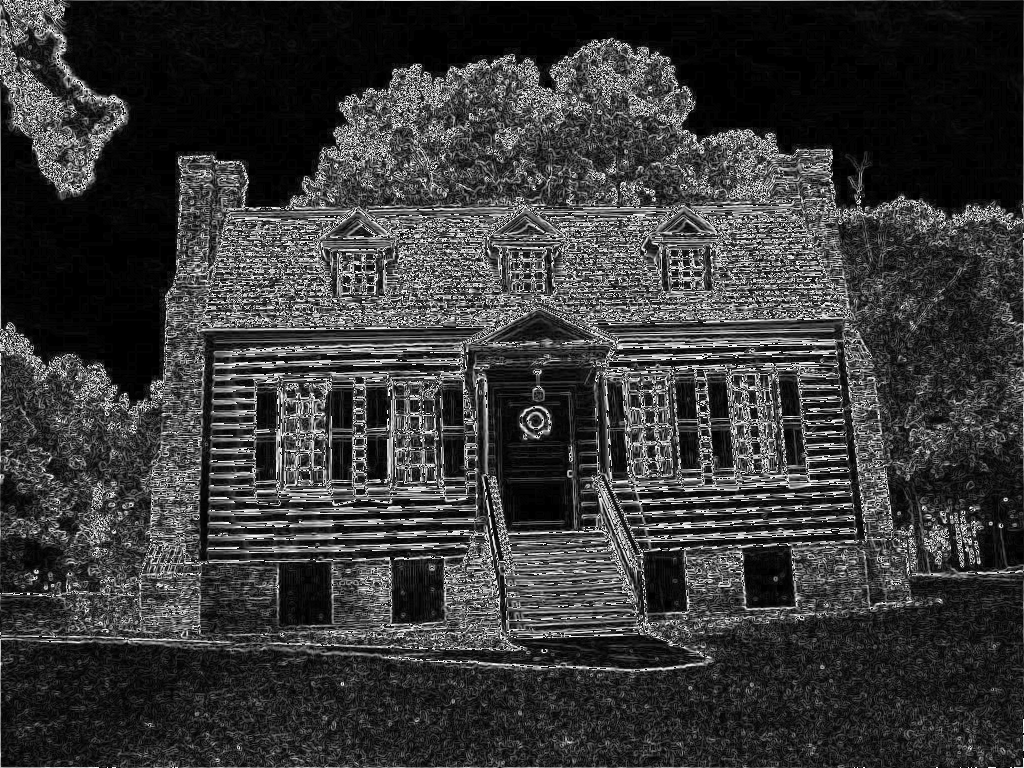

In [143]:
sobelXResult2 = ImageConvolutionFilter(house2, sobelX)
sobelYResult2 = ImageConvolutionFilter(house2, sobelY)

sobelMagnitude2 = np.sqrt(sobelXResult2**2 + sobelYResult2**2)

cv2_imshow(sobelMagnitude2.astype(np.uint8))

cv2.waitKey(0)
cv2.destroyAllWindows()

Upon applying the Sobel edge operators to both house pictures, we notice the output image which is combined edge information (magnitude) that contains  both the vertical and horizontal edges, the sobel operators enhance the detection of structural features in the image, making them more prominent Which is used with edge detection, each horizental and vertical edges emphasizes gradients in different direction to provide more detailed structural features.

4- Prewitt Edge Operators:

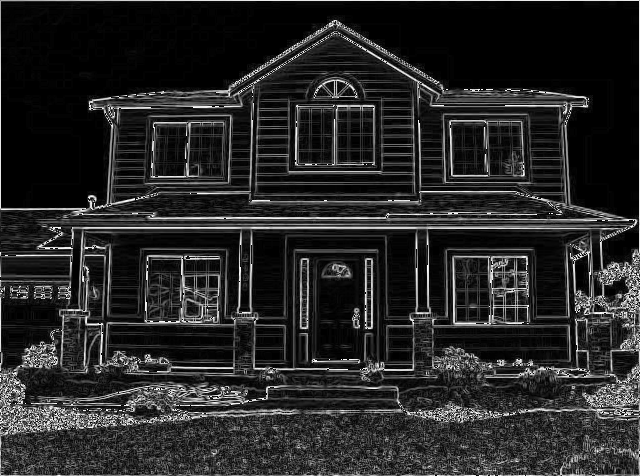

In [144]:
prewittX = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

prewittY = np.array([[1, 1, 1],
                     [0, 0, 0],
                     [-1, -1, -1]])

prewittXResult = ImageConvolutionFilter(house1, prewittX)
prewittYResult = ImageConvolutionFilter(house1, prewittY)

prewittMagnitude = np.sqrt(prewittXResult**2 + prewittYResult**2)

cv2_imshow(prewittMagnitude.astype(np.uint8))

cv2.waitKey(0)
cv2.destroyAllWindows()

Now applying it to the second image:

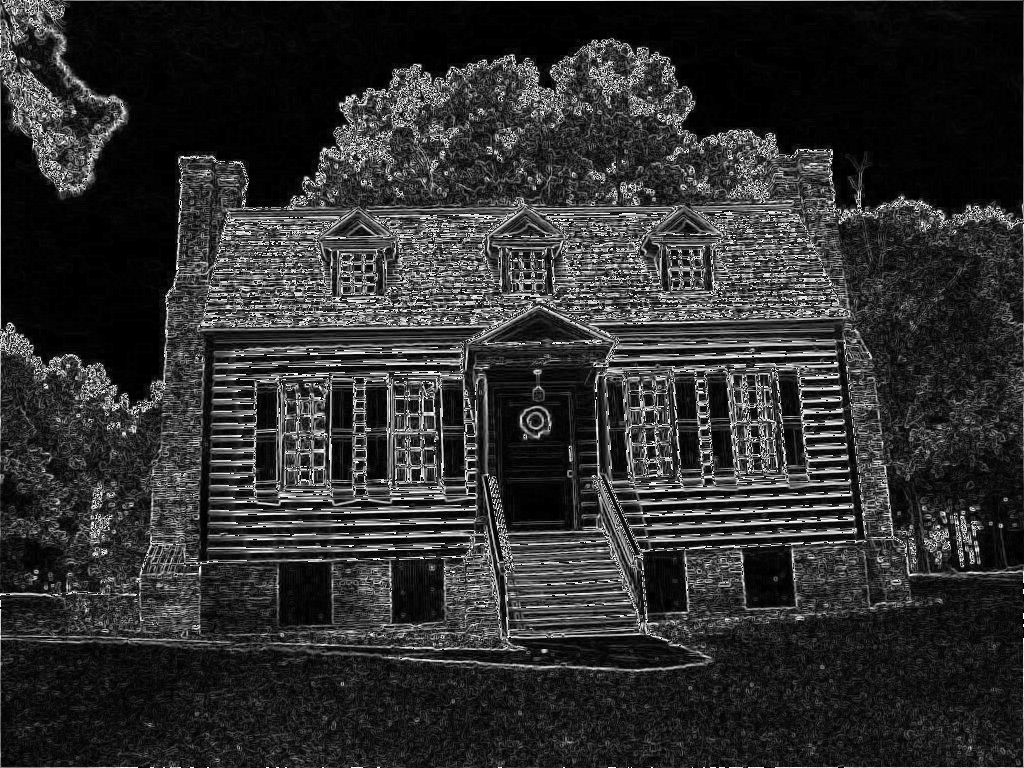

In [145]:
prewittXResult2 = ImageConvolutionFilter(house2, prewittX)
prewittYResult2 = ImageConvolutionFilter(house2, prewittY)

prewittMagnitude2 = np.sqrt(prewittXResult2**2 + prewittYResult2**2)

cv2_imshow(prewittMagnitude2.astype(np.uint8))

cv2.waitKey(0)
cv2.destroyAllWindows()

Upon applying the prewitt edge operators to both house pictures, we notice the output image which is combined edge information (magnitude) that contains  both the vertical and horizontal edges, which enhanced the edge detection in the image a bit more than sobel, this is because sobel focuses on diagonal edges unlinke prewitt.

**Question#3**

Attached “Noisyimage1” and “Noisyimage2” are corrupted by salt and paper noise.
Apply 5 by 5 Averaging and Median filter and show your outputs. Why Median filter
works better than averaging filter?

First displaying the two noisy images to notice the salt and pepper:

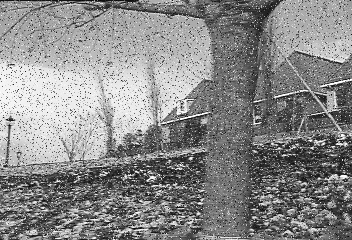

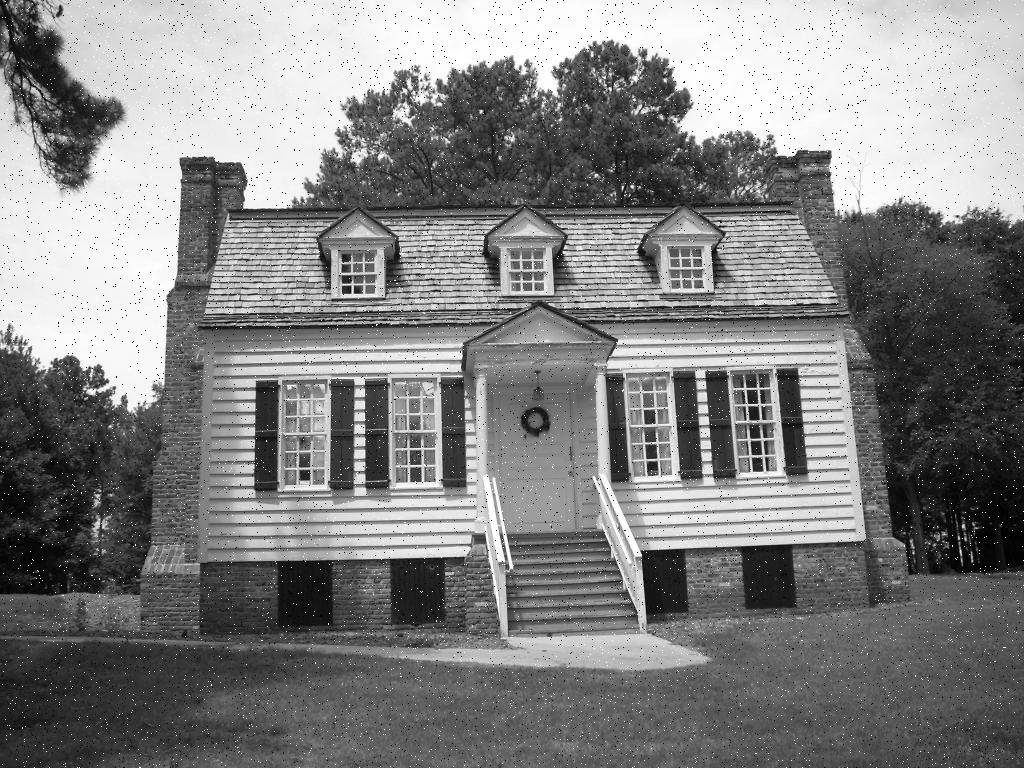

In [146]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

noisyImage1 = cv2.imread('Noisyimage1.jpg', cv2.IMREAD_GRAYSCALE)
noisyImage2 = cv2.imread('Noisyimage2.jpg', cv2.IMREAD_GRAYSCALE)

cv2_imshow(noisyImage1)
cv2_imshow(noisyImage2)



Then applying averaging filter and median to the first image:

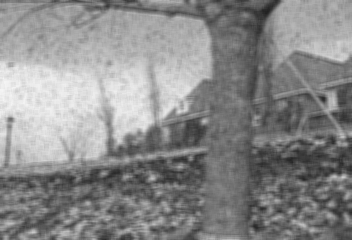

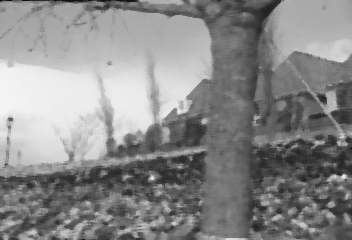

In [147]:
noisyImage1Averaging = cv2.blur(noisyImage1, (5, 5))

noisyImage1Median = cv2.medianBlur(noisyImage1, 5)

cv2_imshow(noisyImage1Averaging)
cv2_imshow(noisyImage1Median)


Then followed by that applying the same for the second image

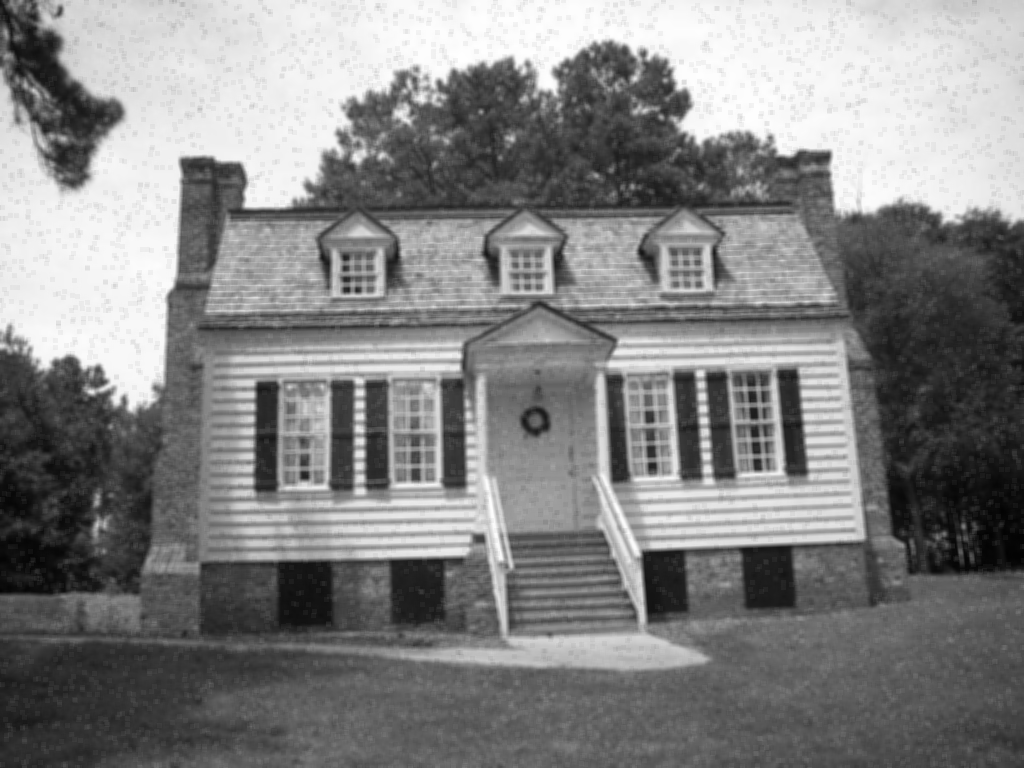

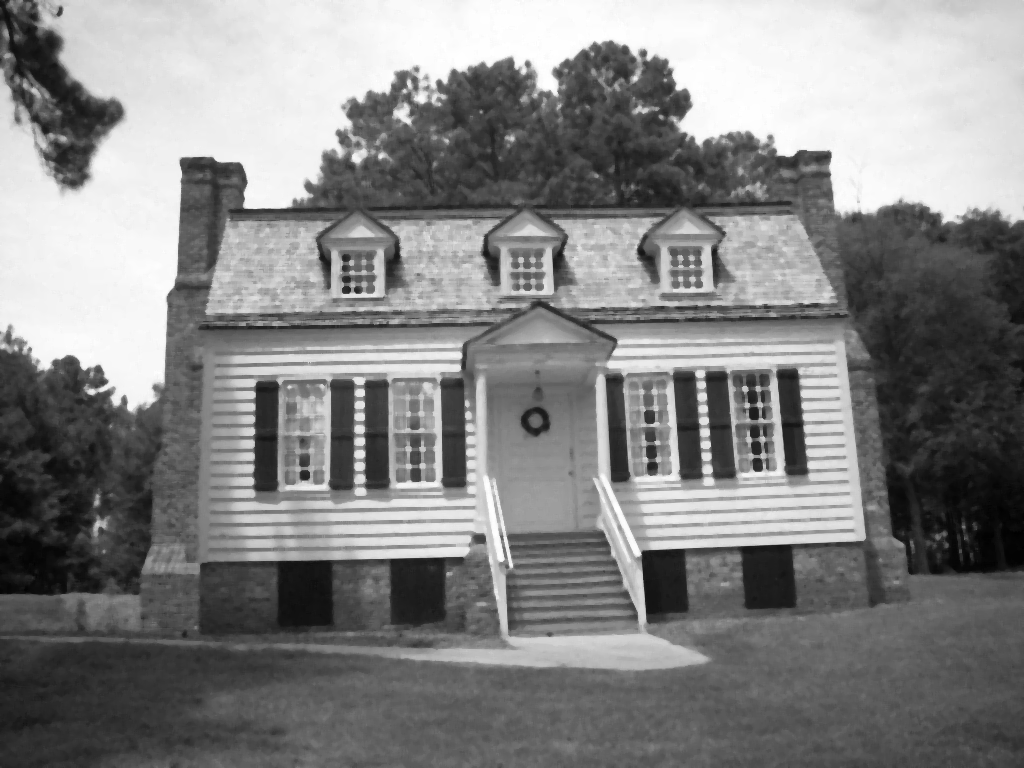

In [148]:
noisyImage2Averaging = cv2.blur(noisyImage2, (5, 5))

noisyImage2Median = cv2.medianBlur(noisyImage2, 5)

cv2_imshow(noisyImage2Averaging)
cv2_imshow(noisyImage2Median)


In the context of salt and pepper noise we can notice as seen by the images above before and after filteration using both averaging and median filtering that the median filter is often more effective than the mveraging filter for noise removal. Salt and pepper introduces random pixels to our image, the Median filter replaces each pixel with the median value in its neighborhood, which makes it robust to outliers. while the averaging filter just computes the average thus making it sensitive to extreme values.

**Question#4**

Compute gradient magnitude for attached image “Q4_Image” (using built-in sobel
gradients function).
1. Stretch the resulting magnitude (between 0 to 255) for better visualization
2. Compute the histogram of gradient magnitude
3. Compute gradient orientation (the angle of gradient vector)
4. Compute histogram of gradient orientation (angle between 0 and 2*pi)

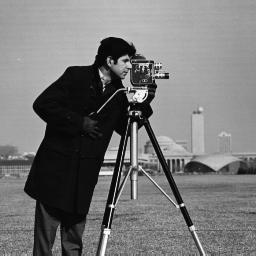

In [149]:
imageQ4 = cv2.imread('Q_4.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(imageQ4)

Computing the gradient magnitude using sobel built in fucntion

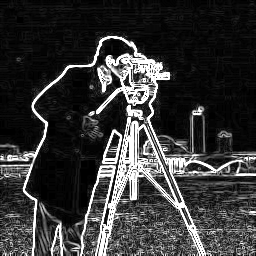

In [150]:
imageQ4X = cv2.Sobel(imageQ4, cv2.CV_64F, 1, 0, ksize=3)
imageQ4Y = cv2.Sobel(imageQ4, cv2.CV_64F, 0, 1, ksize=3)

imageQ4Magnitude = np.sqrt(imageQ4X**2 + imageQ4Y**2)
cv2_imshow(imageQ4Magnitude)


1. Stretch the resulting magnitude (between 0 to 255) for better visualization


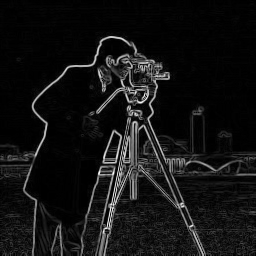

In [151]:
imageQ4Streteched = cv2.normalize(imageQ4Magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
cv2_imshow(imageQ4Streteched)


2. Compute the histogram of gradient magnitude


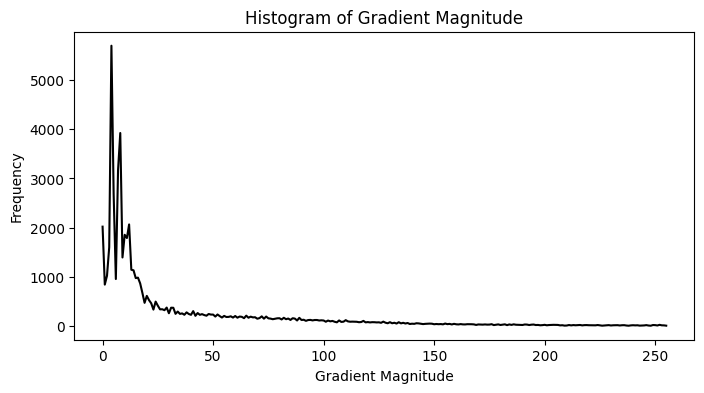

In [152]:
from matplotlib import pyplot as plt
hist, bins = np.histogram(imageQ4Magnitude.flatten(), bins=256, range=[0,256])

plt.figure(figsize=(8, 4))
plt.plot(hist, color='black')
plt.title('Histogram of Gradient Magnitude')
plt.xlabel('Gradient Magnitude')
plt.ylabel('Frequency')
plt.show()


3. Compute gradient orientation (the angle of gradient vector)


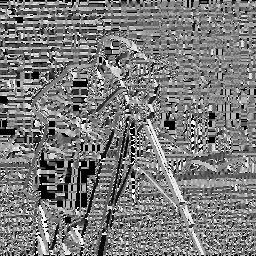

In [153]:
imageQ4Orientation = np.arctan2(imageQ4Y, imageQ4X)
imageQ4Orientation = np.rad2deg(imageQ4Orientation)

cv2_imshow(imageQ4Orientation.astype(np.uint8))

4. Compute histogram of gradient orientation (angle between 0 and 2*pi)

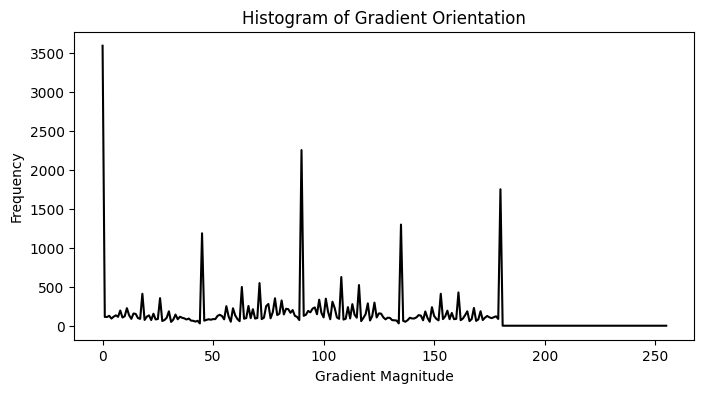

In [154]:
hist, bins = np.histogram(imageQ4Orientation.flatten(), bins=256, range=[0,256])

plt.figure(figsize=(8, 4))
plt.plot(hist, color='black')
plt.title('Histogram of Gradient Orientation')
plt.xlabel('Gradient Magnitude')
plt.ylabel('Frequency')
plt.show()

**Question#5**

Load walk_1.jpg and walk_2.jpg images in Python. Convert them to gray scale
and subtract walk_2.jpg from walk_1.jpg. What is the result? Why?


Displaying the two images.

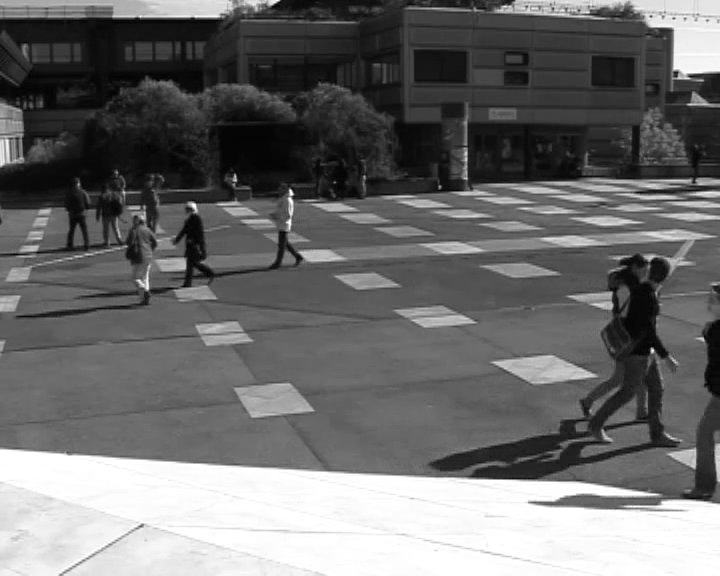

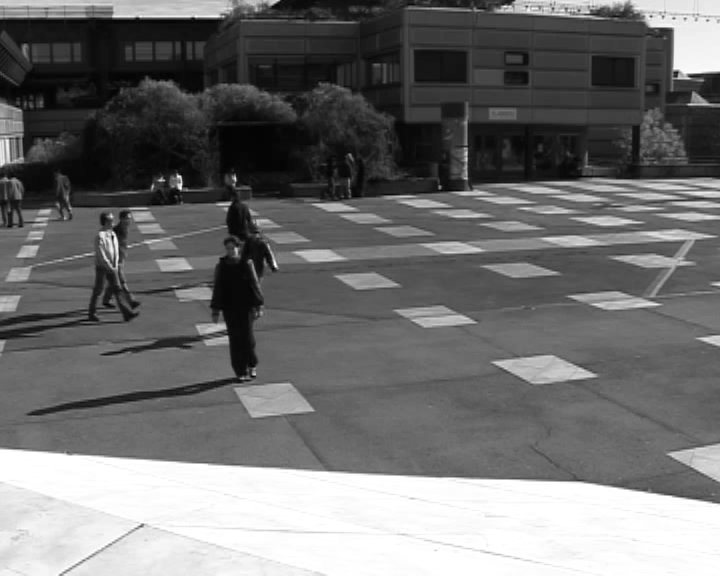

In [155]:
walk1 = cv2.imread('walk_1.jpg', cv2.IMREAD_GRAYSCALE)
walk2 = cv2.imread('walk_2.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(walk1)
cv2_imshow(walk2)


Then we subtract the second image from the first

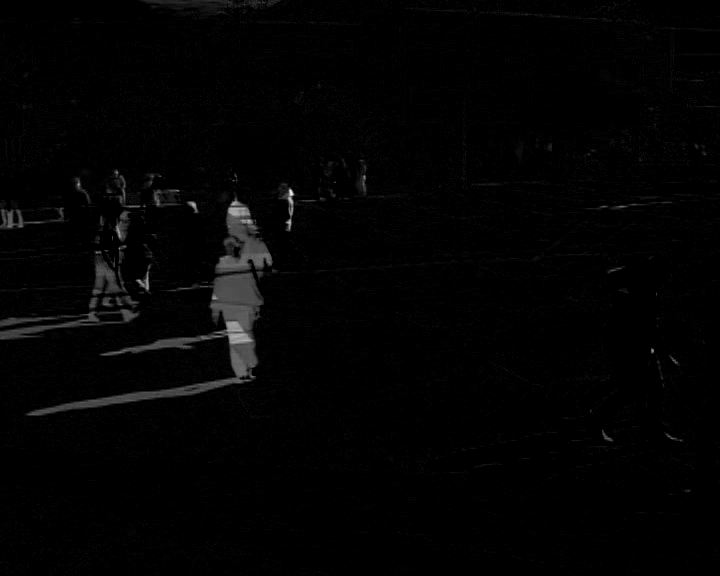

In [156]:
subtractedImage = cv2.subtract(walk1, walk2)
cv2_imshow(subtractedImage)

Upon subtracting the second walk image from the first one, the subtraction will highlight the differences between the two images. The darker areas indicate regions where the intensity in second image is higher where light areas are where the intensity is bigger in the first image.

**Question 6**

Apply canny edge detector on the “Q_4.jpg” using OpenCV function “Canny”. Test
different values of ‘Threshold’.

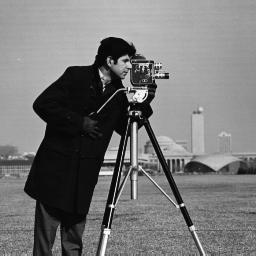

In [157]:
imageQ4_2 = cv2.imread('Q_4.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(imageQ4_2)


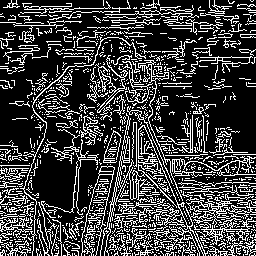

In [158]:
threshold = 10
imageQ4_edge = cv2.Canny(imageQ4_2, threshold, threshold * 2)
cv2_imshow(imageQ4_edge)

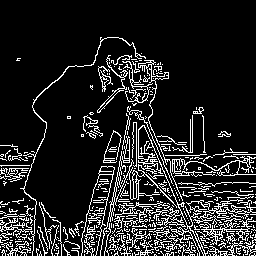

In [159]:
threshold = 50
imageQ4_edge = cv2.Canny(imageQ4_2, threshold, threshold * 2)
cv2_imshow(imageQ4_edge)

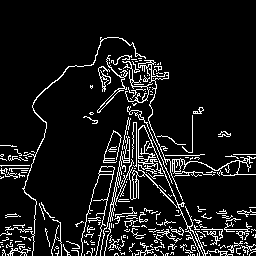

In [160]:
threshold = 100
imageQ4_edge = cv2.Canny(imageQ4_2, threshold, threshold * 2)
cv2_imshow(imageQ4_edge)

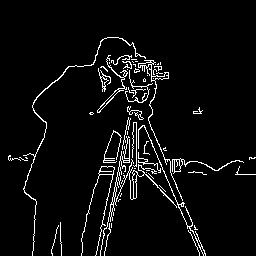

In [161]:
threshold = 200
imageQ4_edge = cv2.Canny(imageQ4_2, threshold, threshold * 2)
cv2_imshow(imageQ4_edge)

As we know pixels with gradient magnitudes below the lower threshold are suppressed, and those above the upper threshold are considered strong edges.

After trying multiple thresholds, we can notice this happen in the images, as strong edges are the only one present when we increase the threshold, each time we increase it we can see the edges decrease as the threshold interval increases and only include the strong edges.